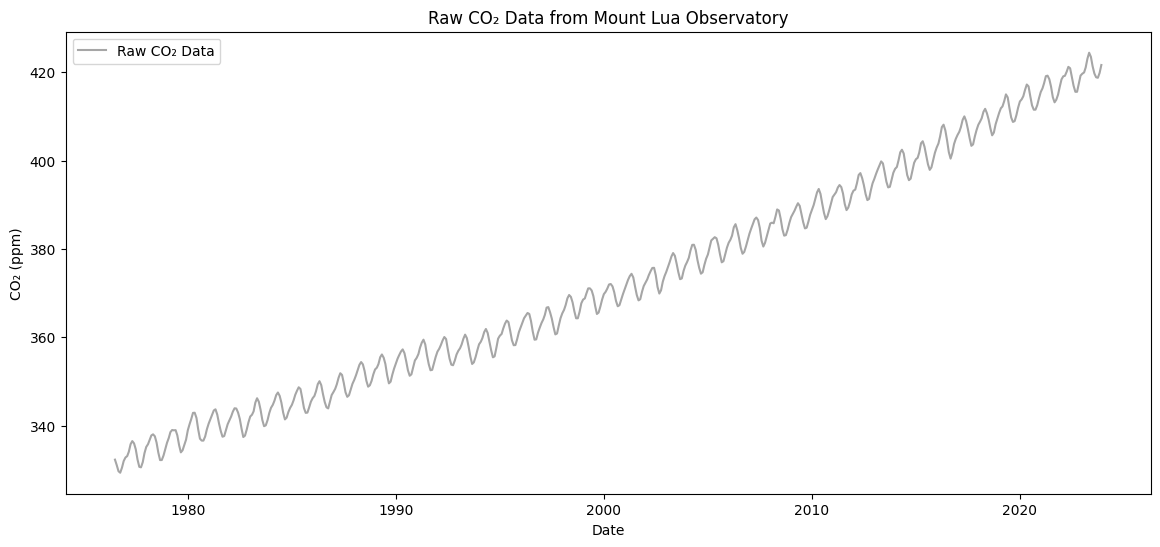

Data is not evenly spaced or data points are missing
FFT could not be computed due to missing or unevenly spaced data.


In [ ]:
"""
 data_presentation.ipynb
This notebook analyzes and visualizes CO₂ data using FFT-based techniques from preparation.py module.
"""

# Importing necessary libraries and the preparation module
import preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CO₂ data
file_path = 'mauna-loa-data/flask_monthly.json'
raw_co2_series = preparation.get_timeseries(file_path)

# Plot the raw CO₂ data
plt.figure(figsize=(14, 6))
plt.plot(raw_co2_series, label='Raw CO₂ Data', color='grey', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("CO₂ (ppm)")
plt.title("Raw CO₂ Data from Mount Lua Observatory")
plt.legend()
plt.show()

# Clean the data by dropping missing values
co2_series = raw_co2_series.dropna()
co2_series = co2_series[co2_series > 0]

# Perform FFT and take only the half magnitude spectrum value
fft_values = preparation.fft_mag(co2_series)
if fft_values is None:
    print("FFT could not be computed due to missing or unevenly spaced data.")
else:
    # Calculate frequencies for FFT using 'month' as the time unit
    fft_freq = preparation.calc_freq(co2_series, "month")
    if fft_freq is None:
        print("Frequency calculation could not be completed due to missing or unevenly spaced data.")

    # Perform inverse FFT to reconstruct the time-domain signal
    reconstructed_series = preparation.inv_fft(fft_values)

    # Plot 1: Raw Data vs FFT Magnitude Spectrum
    plt.figure(figsize=(14, 6))

    # Subplot 1: Raw Data (CO₂ concentration over time)
    plt.subplot(1, 2, 1)
    plt.plot(co2_series.index, co2_series, label="Raw CO₂ Data", color="blue")
    plt.xlabel("Time")
    plt.ylabel("CO₂ (ppm)")
    plt.title("Raw CO₂ Concentration Data")
    plt.legend()

    # Subplot 2: FFT Magnitude vs Frequency
    plt.subplot(1, 2, 2)
    plt.plot(fft_freq[:len(fft_values)//2], np.abs(fft_values)[:len(fft_values)//2], color="orange", label="FFT Magnitude")
    plt.xlabel("Frequency (cycles per month)")
    plt.ylabel("Magnitude")
    plt.title("FFT Magnitude Spectrum")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot 2: Raw Data vs Inverse FFT Reconstruction
    plt.figure(figsize=(10, 6))
    plt.plot(co2_series.index, co2_series, label="Raw CO₂ Data", color="blue")
    plt.plot(co2_series.index, reconstructed_series, label="Inverse FFT (Reconstructed)", color="red", linestyle="--")
    plt.xlabel("Time")
    plt.ylabel("CO₂ (ppm)")
    plt.title("Raw CO₂ Data vs Inverse FFT Reconstruction")
    plt.legend()

    plt.show()